### Predicting Chicago Apartment Rental Price with Craiglist Data
In this notebook we are going to explore data scraped from chicago craiglist listings. The data was crawled using scrapy. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('../data/chicago_craiglist_housing.csv', index_col='postid')

In [21]:
df.shape

(1191, 10)

In [22]:
df.head(2)

,area,baths,beds,latitude,link,longitude,others,postdate,price,title
postid,,,,,,,,,,
6824723091,NaN,1Ba,1BR,41.956332,https://chicago.craigslist.org/chc/apa/d/chica...,-87.669255,NaN,Feb 26,$1420,Renovated Lakeview 1BD apt w/ Pets Welcome. Wa...
6824700825,NaN,1Ba,0BR,41.903300,https://chicago.craigslist.org/chc/apa/d/chica...,-87.633600,NaN,Feb 26,$1295,Spacious Studio apt in Old Town w/ No Sec Dep....


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 6824723091 to 6828590008
Data columns (total 10 columns):
area         354 non-null float64
baths        1161 non-null object
beds         1169 non-null object
latitude     1188 non-null float64
link         1191 non-null object
longitude    1188 non-null float64
others       352 non-null object
postdate     1191 non-null object
price        1191 non-null object
title        1191 non-null object
dtypes: float64(3), object(7)
memory usage: 102.4+ KB


In [24]:
df['beds'] = df['beds'].str.replace('BR', '').astype('float')
df['baths'] = df['baths'].str.replace('Ba', '').astype('float')
df['price'] = df['price'].str.replace('$', '').astype('float')

In [25]:
df = df[['link','title','postdate', 'latitude', 'longitude', 'beds', 'baths', 'area', 'others', 'price']]

In [26]:
df.head(3)

,link,title,postdate,latitude,longitude,beds,baths,area,others,price
postid,,,,,,,,,,
6824723091,https://chicago.craigslist.org/chc/apa/d/chica...,Renovated Lakeview 1BD apt w/ Pets Welcome. Wa...,Feb 26,41.956332,-87.669255,1.0,1.0,NaN,NaN,1420.0
6824700825,https://chicago.craigslist.org/chc/apa/d/chica...,Spacious Studio apt in Old Town w/ No Sec Dep....,Feb 26,41.903300,-87.633600,0.0,1.0,NaN,NaN,1295.0
6824703239,https://chicago.craigslist.org/chc/apa/d/chica...,Charming Studio Apt in Gold Coast w/ Heat Incl...,Feb 26,41.904032,-87.630053,0.0,1.0,NaN,NaN,1095.0


In [27]:
dfoutlier = df[df['beds'] > 10]

In [28]:
dfoutlier.head(100)

,link,title,postdate,latitude,longitude,beds,baths,area,others,price
postid,,,,,,,,,,
6828576166,https://chicago.craigslist.org/chc/apa/d/chica...,Modern East Lakeview One bed one bath With on...,Feb 26,41.935732,-87.639654,700.0,NaN,NaN,NaN,1735.0
6825136814,https://chicago.craigslist.org/chc/apa/d/chica...,CLEAN 1 BEDROOM HEAT & GAS INCLUDED,Feb 26,41.939031,-87.721757,800.0,NaN,NaN,NaN,1000.0
6825065669,https://chicago.craigslist.org/chc/apa/d/chica...,★ Clean 1 Bedroom Heat & Gas Included Access t...,Feb 26,41.937831,-87.721857,800.0,NaN,NaN,NaN,1000.0
6825061145,https://chicago.craigslist.org/chc/apa/d/chica...,Super Attractive Avondale 1 Bed Minutes to Eve...,Feb 26,41.936831,-87.720457,800.0,NaN,NaN,NaN,1000.0
6824285039,https://chicago.craigslist.org/chc/apa/d/chica...,☆ PET FRIENDLY- HEAT INCLUDED- CTA BROWN LINE,Feb 26,41.968664,-87.695116,1000.0,NaN,NaN,NaN,1300.0
6820343693,https://chicago.craigslist.org/chc/apa/d/chica...,Must See Penthouse in WICKER PARK - 4Beds/3Bat...,Feb 26,41.903612,-87.666109,2500.0,NaN,NaN,NaN,3200.0
6820361770,https://chicago.craigslist.org/chc/apa/d/chica...,Super Attractive Brand New Renovated Lincoln S...,Feb 26,41.968731,-87.693957,700.0,NaN,NaN,NaN,1400.0
6824059367,https://chicago.craigslist.org/chc/apa/d/chica...,"Spacious 2 bedroom in Classic 2 -Flat, Access ...",Feb 26,41.964231,-87.738358,1200.0,NaN,NaN,NaN,1450.0


In [37]:
outlier_idx = df.loc[df['beds'] > 20]
df[outlier_idx, 'area'] = df['beds']
df.loc[outlier_idx, 'beds'] = np.NaN

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

In [ ]:
dfoutlier['area']

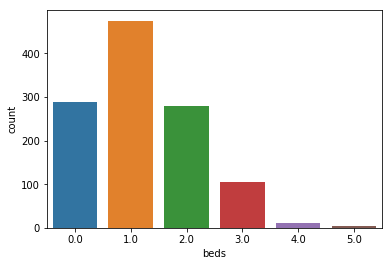

In [61]:
sns.countplot(x='beds', data = df)

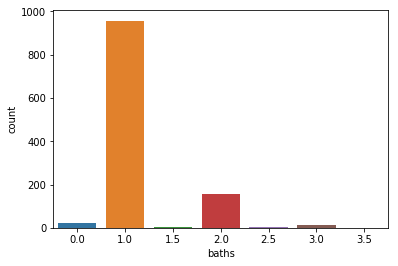

In [62]:
sns.countplot(x='baths', data = df)

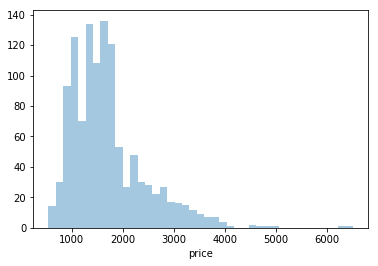

In [64]:
sns.distplot(df['price'], kde=False)

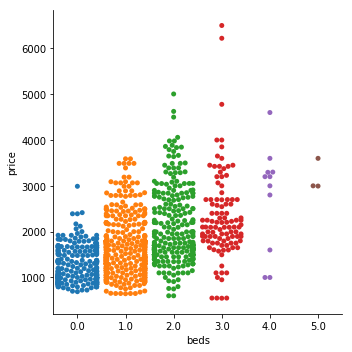

In [69]:
sns.catplot(x="beds", y="price", kind="swarm", data=df);

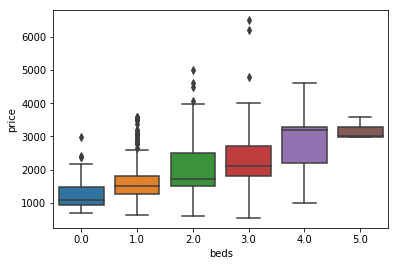

In [78]:
ax = sns.boxplot(x="beds", y="price", data=df)

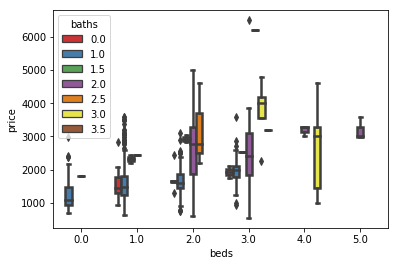

In [82]:
ax = sns.boxplot(x="beds", y="price", hue = "baths", data=df, palette="Set1", linewidth=2.5)

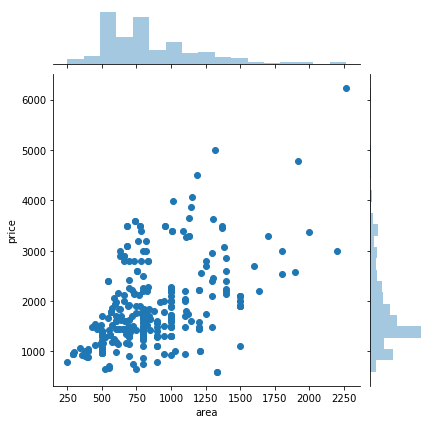

In [83]:
sns.jointplot(x="area", y="price", data=df);

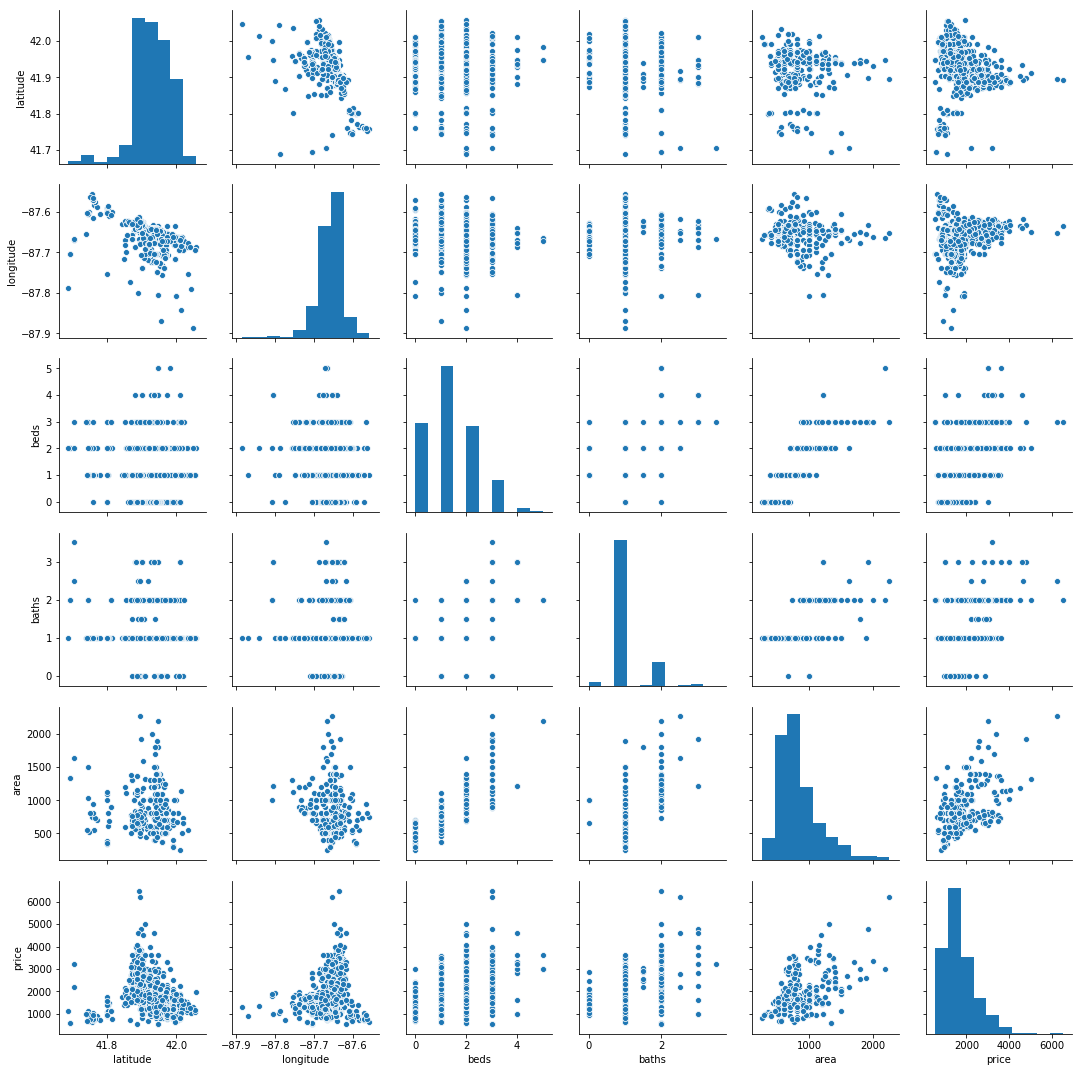

In [81]:
sns.pairplot(df);

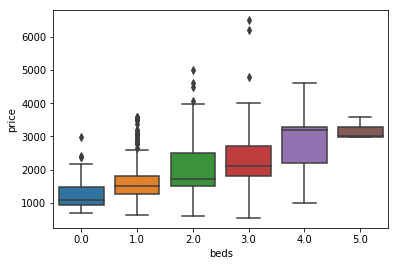

In [71]:
ax = sns.boxplot(x="beds", y="price", data=df)